In [51]:
# Data source:
# https://www.kaggle.com/smeschke/four-shapes

In [52]:
import os, cv2
import matplotlib.pyplot as plt, numpy as np
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
print("Libs Loaded")

Libs Loaded


In [53]:
PATH = r'C:\Users\szymo\PycharmProjects\shapeRecognition\shapes' # dataset file path
IMG_SIZE = 64 # every shape image is in resolution 64x64
shapes = ["circle", "square", "triangle", "star"] # all tipes of shapes
labels = [] # 0-circle, 1-square, 2-triangle, 3-star
dataset = [] # description for single image

In [54]:
# From kernel: https://www.kaggle.com/smeschke/load-data
for shape in shapes:
    print("Getting data for: ", shape)
    #iterate through each file in the folder
    dirs = os.listdir(PATH + "\\" + shape)
    for file in dirs:
        #add the image to the list of images
        final_path = PATH + "\\" + shape + "\\" + file
        image = cv2.imread(final_path)
        if image is None:
            print('Wrong path: ', final_path)
            break
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image = image.reshape(12288)
        dataset.append(image)
        labels.append(shapes.index(shape))
print("Dataset loaded to model directory.")

Getting data for:  circle
Getting data for:  square
Getting data for:  triangle
Getting data for:  star
Dataset loaded to model directory.


In [55]:
dataset

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 2

In [56]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


[ 9068 12084 12252 12653  2215  7091 14187  5614  1012    29]
9068


TypeError: can only concatenate str (not "numpy.int32") to str

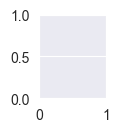

In [78]:
# Printing random images with their indexes above
index = np.random.randint(0, len(dataset) - 1, size = 10) # size of list, NO of elems
print(index) # list
plt.figure(figsize=(5,5))

g = 0
for i, j in enumerate(index, 1): # The enumerate() method adds a counter to an iterable and returns it (the enumerate object).
    print(index[g])
    img = dataset[j].reshape((64, 64, 3))
    lab = shapes[labels[j]]
    plt.subplot(4, 5, i) # subplots method provides a way to plot multiple plots on a single figure - nice format of displaying those shapes
    plt.title(lab + index[g])
    plt.axis('off')
    plt.imshow(img)
    g += 1

In [58]:
X = np.array(dataset)
X

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [59]:
X.shape

(14970, 12288)

In [60]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [61]:
y = np.array(labels)
y

array([0, 0, 0, ..., 3, 3, 3])

In [62]:
y.shape

(14970,)

In [63]:
# scaler = StandardScaler()
# scaler.fit(X)

In [64]:
# X_std = scaler.transform(X)
# X_std

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [66]:
perceptron = Perceptron(eta0=0.01, max_iter=100, shuffle=True)
perceptron.fit(X_train, y_train)
print("Training done")

Training done


In [67]:
# good = y_test[y_test == y_pred].count()
# total = y_test.count()
# print('result: {}'.format(100*good/total))
perceptron.score(X_test, y_test)

0.9904252950345135

In [68]:
y_pred = perceptron.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 3, 0])

In [69]:
bad_results = [(a,b,c) for (a,b,c) in zip(X_test[y_test != y_pred],
                                          y_test[y_test != y_pred],
                                          y_pred[y_test != y_pred] )]
len(bad_results) # wrongly matched shape to name

43

C:\Users\szymo\AppData\Local\Temp\ipykernel_9000\2815028666.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 5))


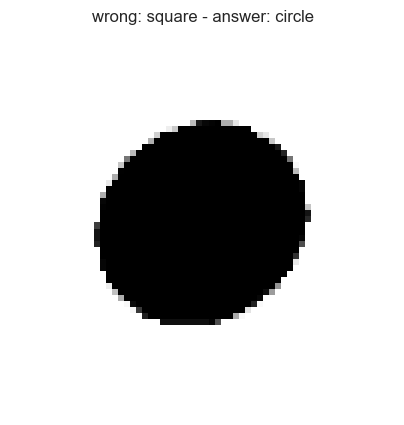

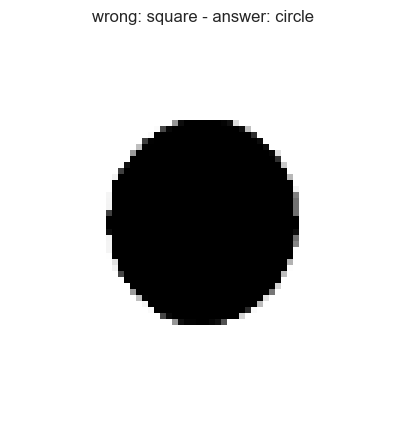

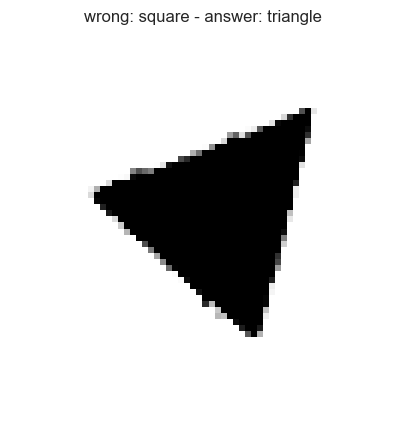

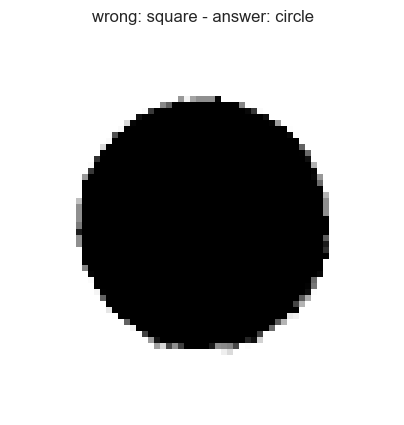

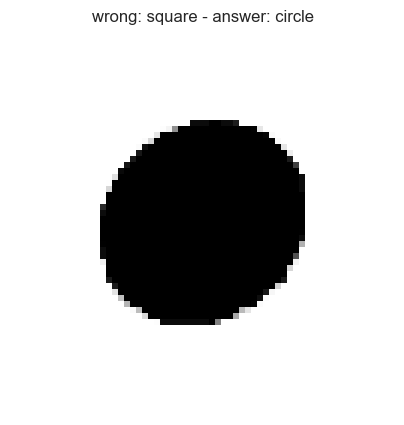

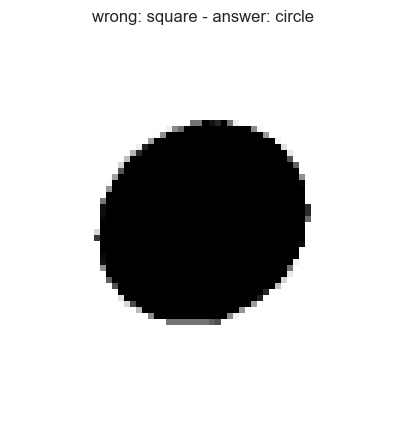

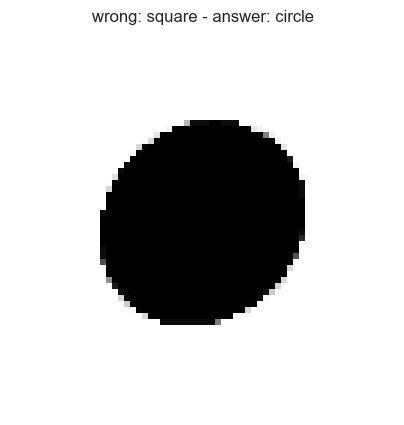

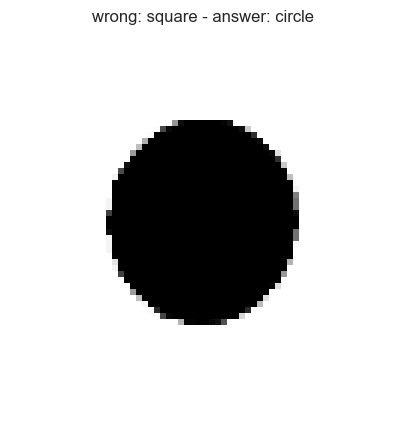

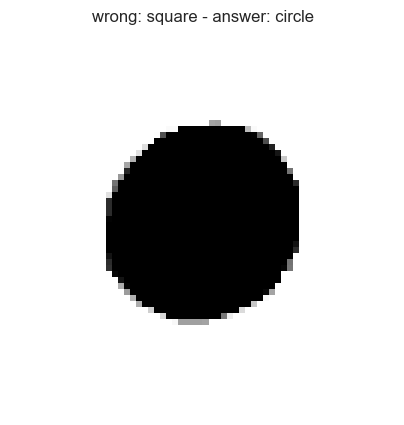

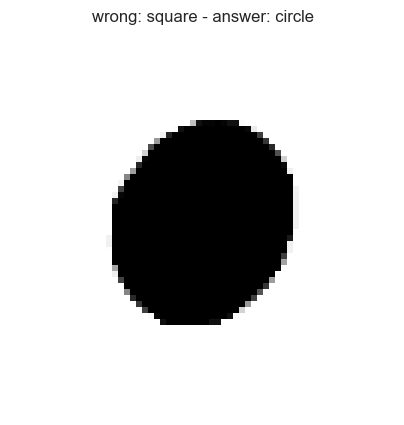

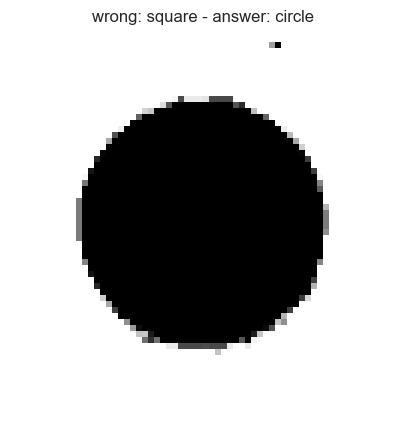

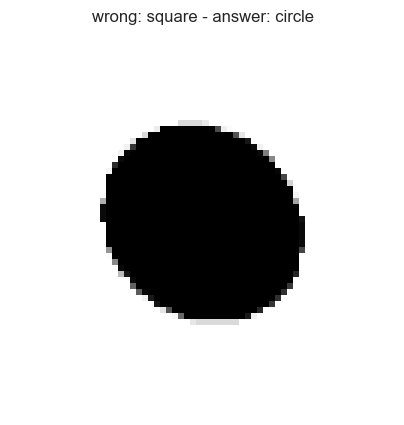

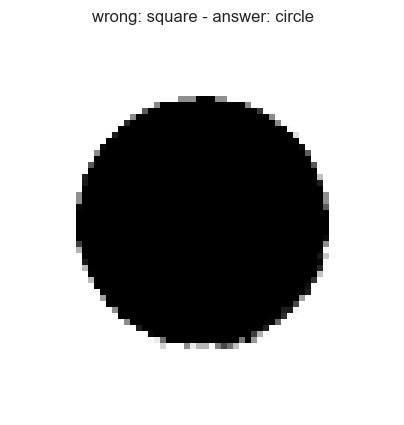

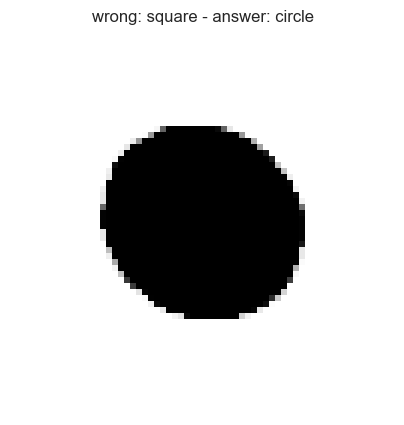

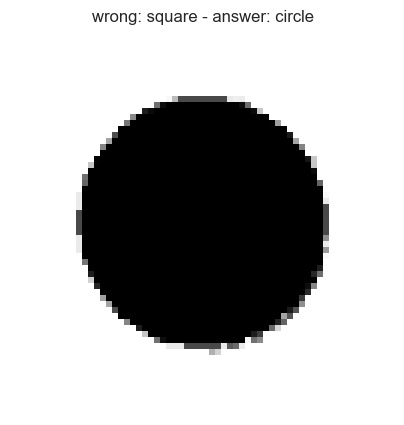

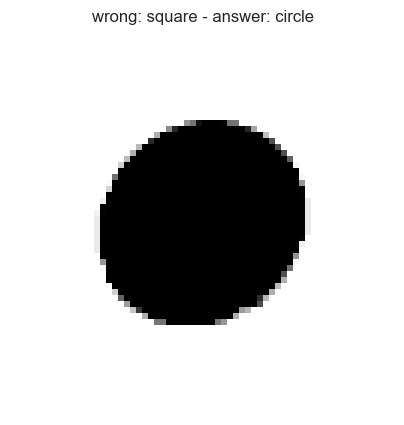

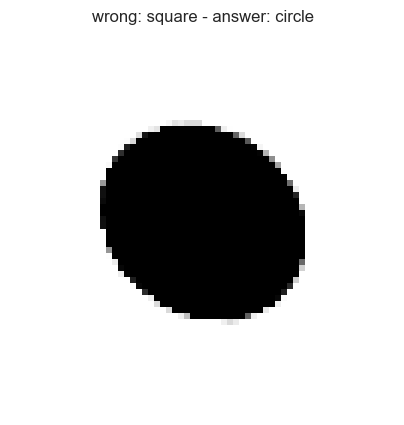

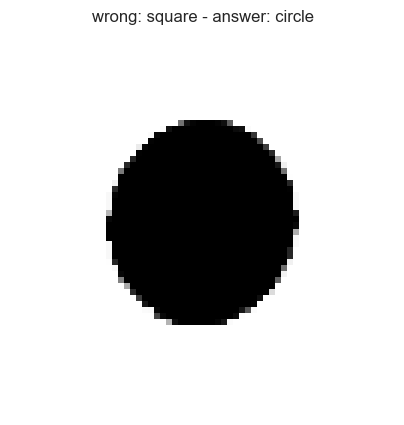

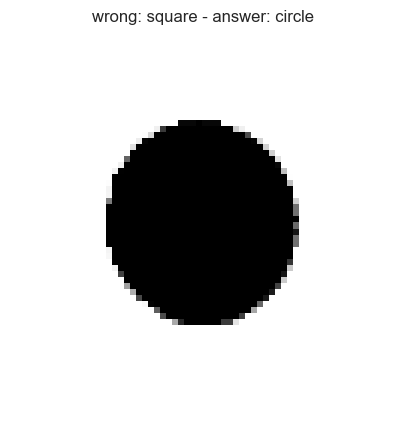

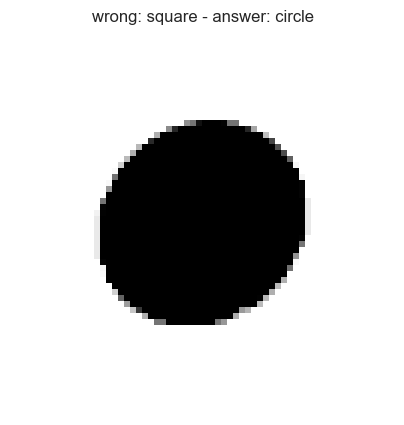

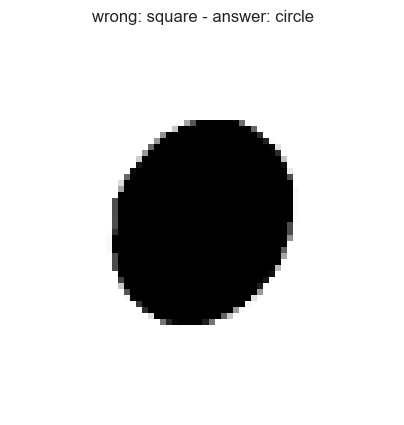

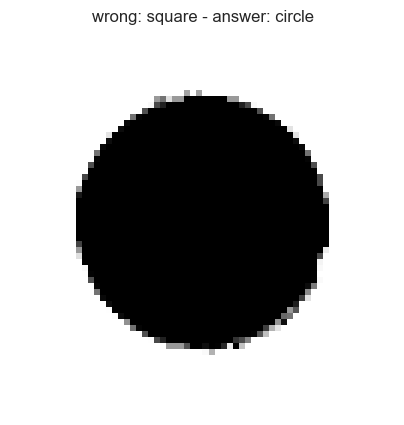

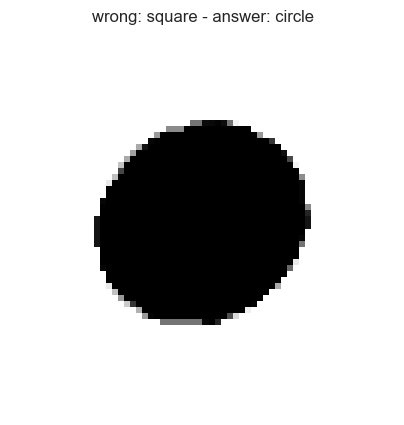

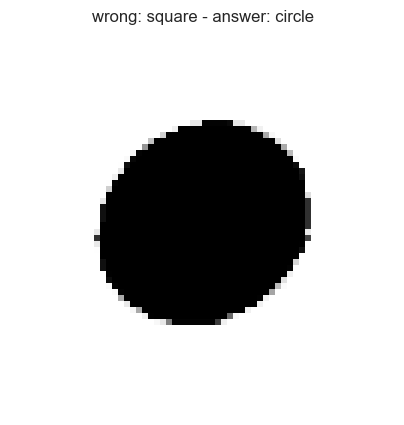

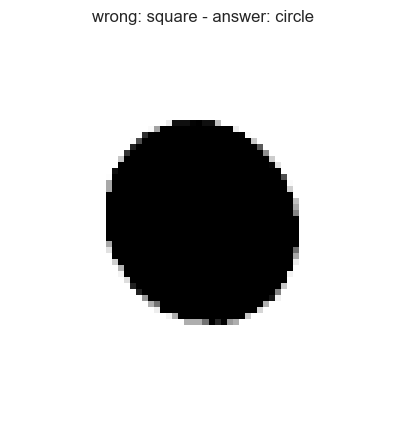

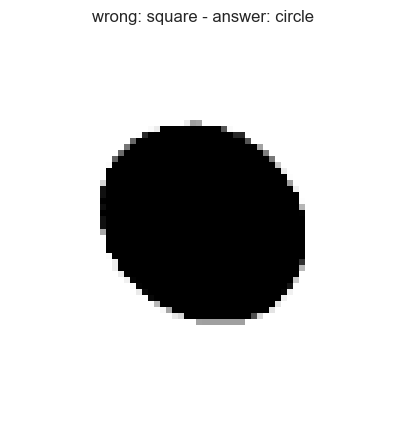

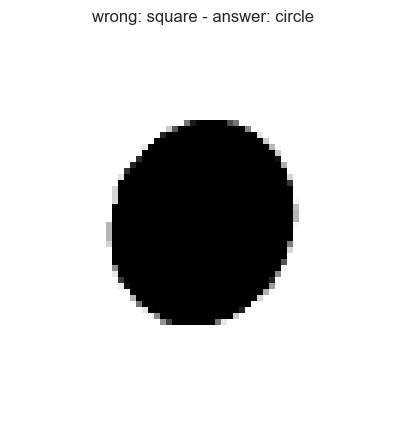

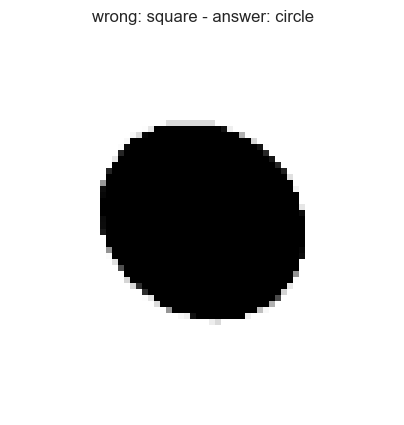

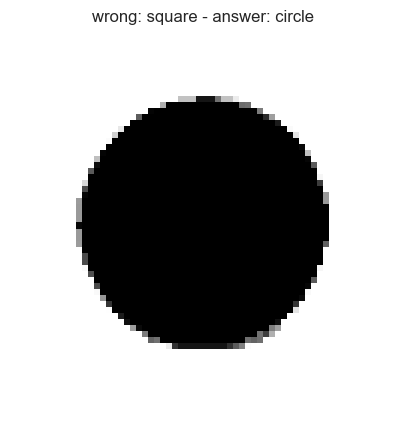

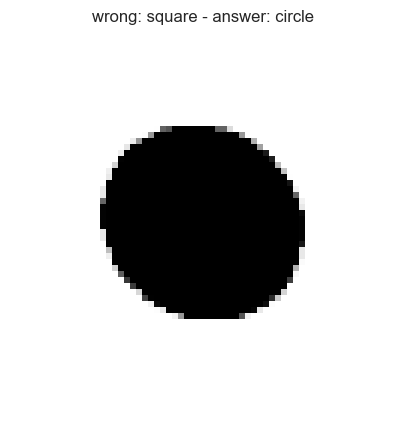

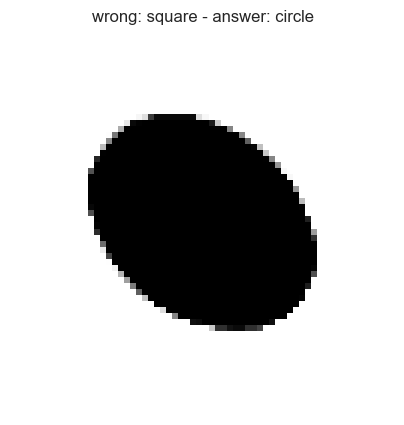

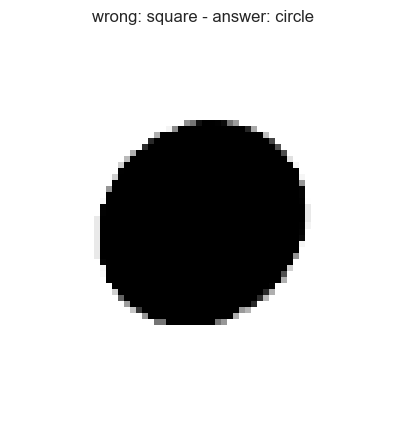

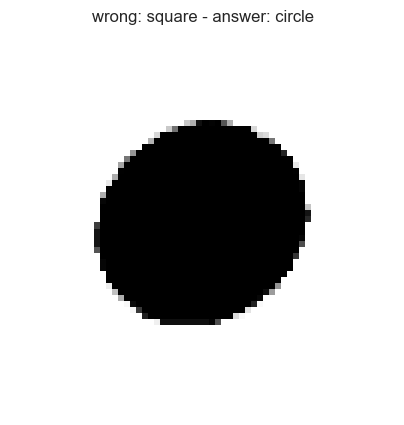

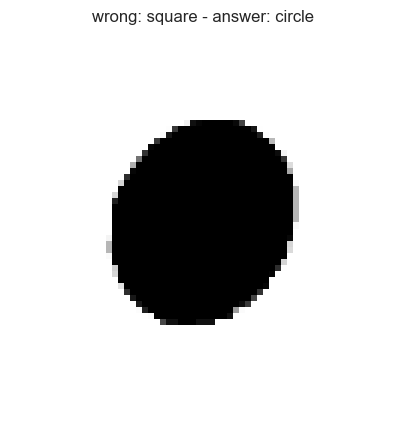

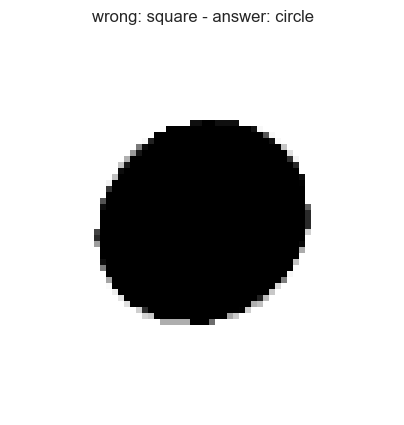

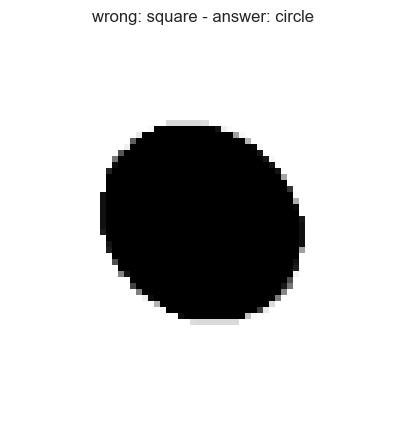

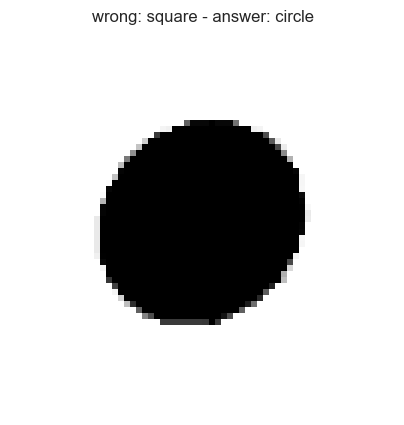

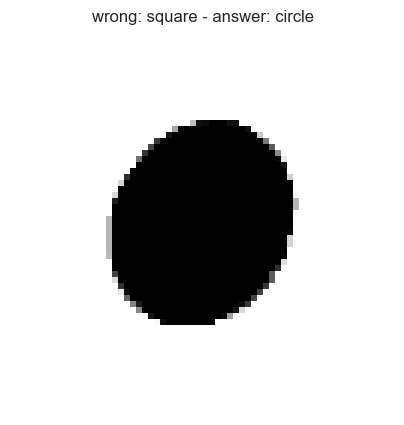

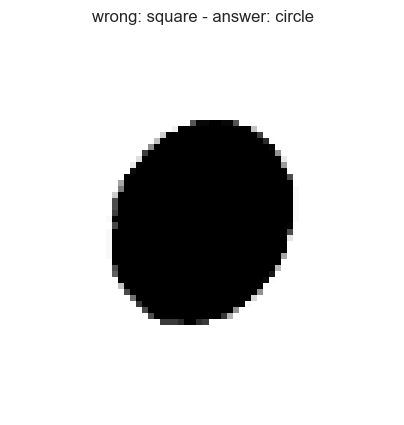

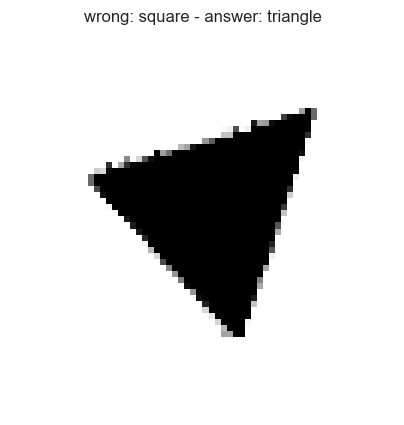

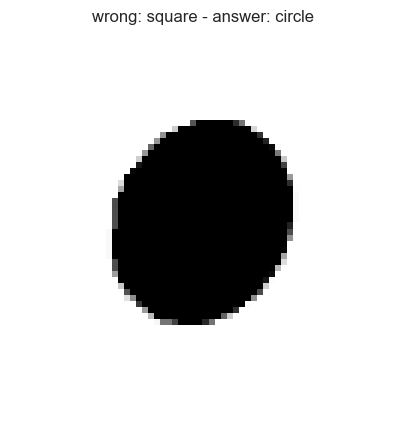

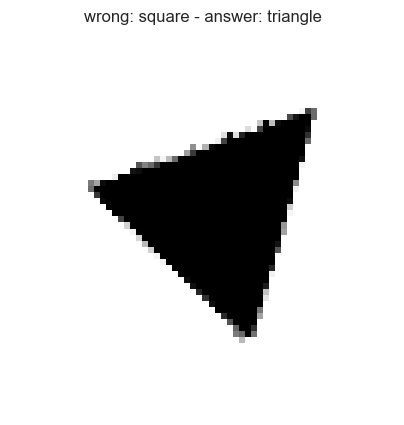

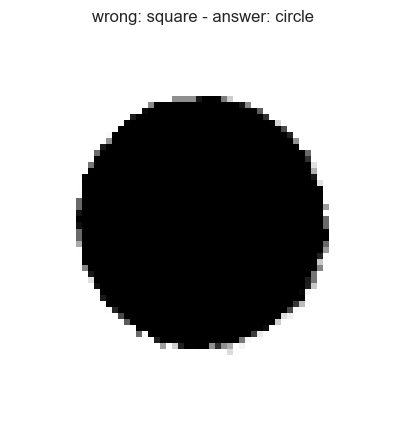

In [70]:
i = 1 # printing above step
for x_test, y_test, y_pred in bad_results:
    img = x_test.reshape((64, 64, 3))
    label_test = shapes[y_test]
    label_pred = shapes[y_pred]
    plt.figure(figsize=(5, 5))
    #plt.subplot(len(bad_results), 1, i)
    plt.title('wrong: ' + label_pred + ' - ' + 'answer: ' + label_test)
    plt.axis('off')
    plt.imshow(img)
    i += 1

In [71]:
# Code to get random correct answer
id = randint(0, y_pred.size)
plt.title(shapes[y_pred[id]])
plt.axis("off")
plt.imshow(X_test[id].reshape((64, 64, 3)))

IndexError: invalid index to scalar variable.

In [ ]:
# Simple 2D shape recognition model done